### Sea Level Rise variable prep

In [1]:
# load packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px # for mapping
import numpy as np
import rioxarray as rioxr
import xarray as xr
from rasterio.features import rasterize # for rasterizing polygons

In [2]:
## read in data
# wildfire hazard potential for the continental US
flood_fp = os.path.join(os.getcwd(), 'data', 'sea_level_rise', 'county_ventura_slr100_w100_fldhazd.shp')
flood = gpd.read_file(flood_fp)

<AxesSubplot:>

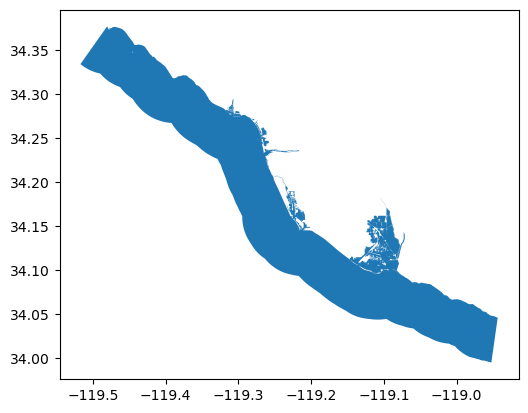

In [4]:
flood.plot()

In [5]:
# read in CA school districts data
ca_schools_fp = os.path.join(os.getcwd(), 'data', 'schools', 'California_School_District_Areas_2022-23.shp')
ca_schools = gpd.read_file(ca_schools_fp)

In [6]:
# subset to Ventura County
vt_schools = ca_schools[ca_schools['CountyName'] == 'Ventura']

In [9]:
# make sure that the coordinate reference systems match
flood = flood.to_crs(vt_schools.crs)

### rasterizing the flooding polygons